### Notes:
    - figure einfügen?
    - copyright figure ( kann ich die einfach nehmen?)


# Tensorforce Tutorial

A new important topic in the field of machine learning is the so-called reinforcement learning. The priciple of algorithms, that learn by itself through reinforcement, how to solve different problems opened a lot new application areas for machine learning. <br>
The basic idea behind reinforcement learning is pictured in *figure 1*. An agent learn to act in an given environment, by taken observation on the environment states and receiving some reward value for the actions already taken by the agent.

A quite new, interesting area for reinforcement learning is the controller design for electrical drives. The idea behind this area is that the agent should learn by itself/ himself ??? to control for example the speed of an electrical drive.


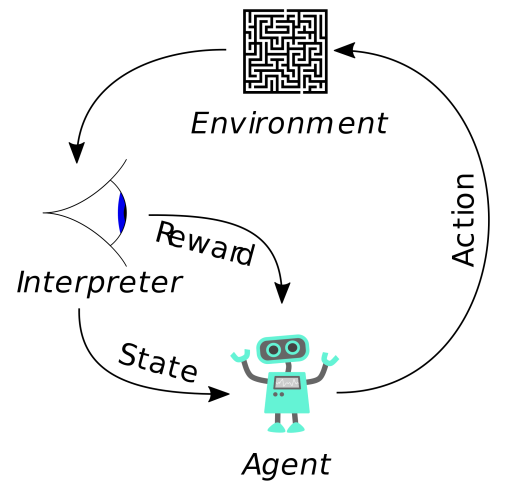

[beispiel für link](https://github.com/upb-lea/gym-electric-motor)

"insert introduction for notebook"

    - link to git repo/ docu
    - explanation to framework

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

import numpy as np
import matplotlib.pyplot as plt

from tensorforce.environments import Environment
from tensorforce.agents import Agent
from tensorforce.execution import Runner

from setting_environment import set_env

/home/pascal/miniconda3/envs/tf_5_env/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## 1. The very basic in Deep-Reinforcement-Learning
    - why deep learning/ why/use (of) neural net 
    - intuition behind q-learning, dqn's
    
    
    - literature references: paper from deepmind (dqn), barto-sutton book

To combine reinforcement learning and deep neural networks a 


- rl agents oft gute leistung
- vorteil von deep NNs ausnutzen (wegen großen state spaces)
- deep rl
- new agent dqn
- basis auf q learning 
- off policy
- genaueres über dqn in deepmind paper

## 2. Gym-Electic-Motor-Enviroments

To have an agent, which can receive a reward, so it can improve the actions taken, the agent needs an environment to interact with. Because it is difficult to get real-world data to work with, the 

- gym envs von open ai
- gem für drive control (gym-like)
- link zu doku, github

### 2.1 Setting up the GEM-Environment

To set up the environment for a permanent-magent-sychronous-machine
- set up from pmsm mit basic parametern, 
- benutzen von constaint monitor oder nur das was in master ??
- generell code auf basis von master oder nightly (der bald master wird)
- initializer ? 
- oder nur set env() und auf gem notebook verweisen

- wenn kein weiterer punkt mehr 2.1 löschen

In [ ]:
max_eps_steps = 10000
simulation_steps = 500000
gem_env = set_env()

# creating tensorforce environment
tensor_env = Environment.create(environment=gem_env,
                                max_episode_timesteps=max_eps_steps)


    - explain: setup, environment, parameters, refer to gem-notebook example
    - link to docu, github
    
    
    

In [3]:
max_eps_steps = 10000
simulation_steps = 5000
gem_env = set_env()

## 3. Using Tensorforce

To take advantage of some already implemented deep-rl agents the *Tensorforce*-Framework can be used.

- wann, wie was kursiv schreiben
- link zu docu, github

### 3.1 Defining an Tensorforce-Environment

In [4]:
# creating tensorforce environment
tensor_env = Environment.create(environment=gem_env,
                                max_episode_timesteps=max_eps_steps)


### 3.2 Setting-up an Tensorforce-Agent

" explaining different agents, for dqn agent hpyerparameter or other possible 
parameter"

In [5]:
# defining parameters for dqn-agent


"""
hyperparameter for agent_config:

    memory: size of replay-buffer
    batch_size: size of mini-batch used for training
    network: net-architect for dqn
    update_frequency: Frequency of updates
    start_updating: memory warm-up steps
    learning_rate for optimizer
    discount: gamma/ discount of future rewards
    target_sync_frequency: Target network gets updated 'sync_freq' steps
    target_update_weight: weight for target-network update

"""
epsilon_decay = {'type': 'decaying',
                 'decay': 'polynomial',
                 'decay_steps': 50000,
                 'unit': 'timesteps',
                 'initial_value': 1.0,
                 'decay_rate': 5e-2,
                 'final_value': 5e-2,
                 'power': 3.0}
net = [
    dict(type='dense', size=64, activation='relu'),
    dict(type='dense', size=64, activation='relu'),
    #dict(type='linear', size=7)
]

agent_config = {
    'agent': 'dqn',
    'memory': 200000,
    'batch_size': 25,
    'network': net,
    'update_frequency': 1,
    'start_updating': 10000,
    'learning_rate': 1e-4,
    'discount': 0.99,
    'exploration': epsilon_decay,
    'target_sync_frequency': 1000,
    'target_update_weight': 1.0}


In [6]:
# creating the agent
dqn_agent = Agent.create(agent=agent_config, environment=tensor_env)


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## 3.3 Training the Agent

"explaining parameters, usage, possibilities to save and load models"

In [7]:
# creating tensorforce-runner to train the agent
runner = Runner(agent=dqn_agent, 
                environment=tensor_env, 
                evaluation=True)
runner.run(num_timesteps=simulation_steps)

Timesteps:  95%|█████████▌| 4770/5000 [00:06<00:00, 769.80it/s, mean_reward=n/a]

In [9]:
vars(runner)

{'environments': [<tensorforce.environments.environment.EnvironmentWrapper at 0x7faaadfca850>],
 'is_environment_external': True,
 'is_environment_remote': False,
 'evaluation': True,
 'is_agent_external': True,
 'agent': <tensorforce.agents.dqn.DeepQNetwork at 0x7faaadfcadd0>,
 'num_episodes': inf,
 'num_timesteps': 5000,
 'num_updates': inf,
 'batch_agent_calls': False,
 'sync_timesteps': False,
 'sync_episodes': False,
 'num_sleep_secs': 0.001,
 'callback_episode_frequency': 1,
 'callback_timestep_frequency': inf,
 'callback': <function tensorforce.execution.runner.Runner.run.<locals>.tqdm_callback(runner, parallel)>,
 'episode_rewards': [-259.1547722954568,
  -279.1254744748554,
  -208.3181660885444,
  -710.8954496274285,
  -199.99999999999983,
  -251.05953297777995,
  -211.5264861214116,
  -203.30936999330999,
  -274.1220545196185,
  -264.46374036432144,
  -223.63027048437854,
  -342.3466699181473,
  -209.8173267184947,
  -216.35810134116537,
  -256.8655278678994,
  -289.156632101

## 4. Evaluating the trained Agent

" explaining evaluation loop and metrics"

"visualizing metrics"